In [60]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.io.cif import CifWriter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [61]:
mp_key = "jBtrGioeefhRZ0bpN5xCDp8bQrH6O0HK"
mp_id = "mp-30459"

## Téléchargement fichier CIF

In [62]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
CifWriter(structure).write_file("mp-30459.cif")
print("Succès du téléchargement du fichier sous le nom :mp-30459.cif ")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Succès du téléchargement du fichier sous le nom :mp-30459.cif 


## Pics de diffraction

L'intensité est l'intensité relative par rapport au pic le plus haut,dans notre cas, le pic le plus haut est le troisième pic.


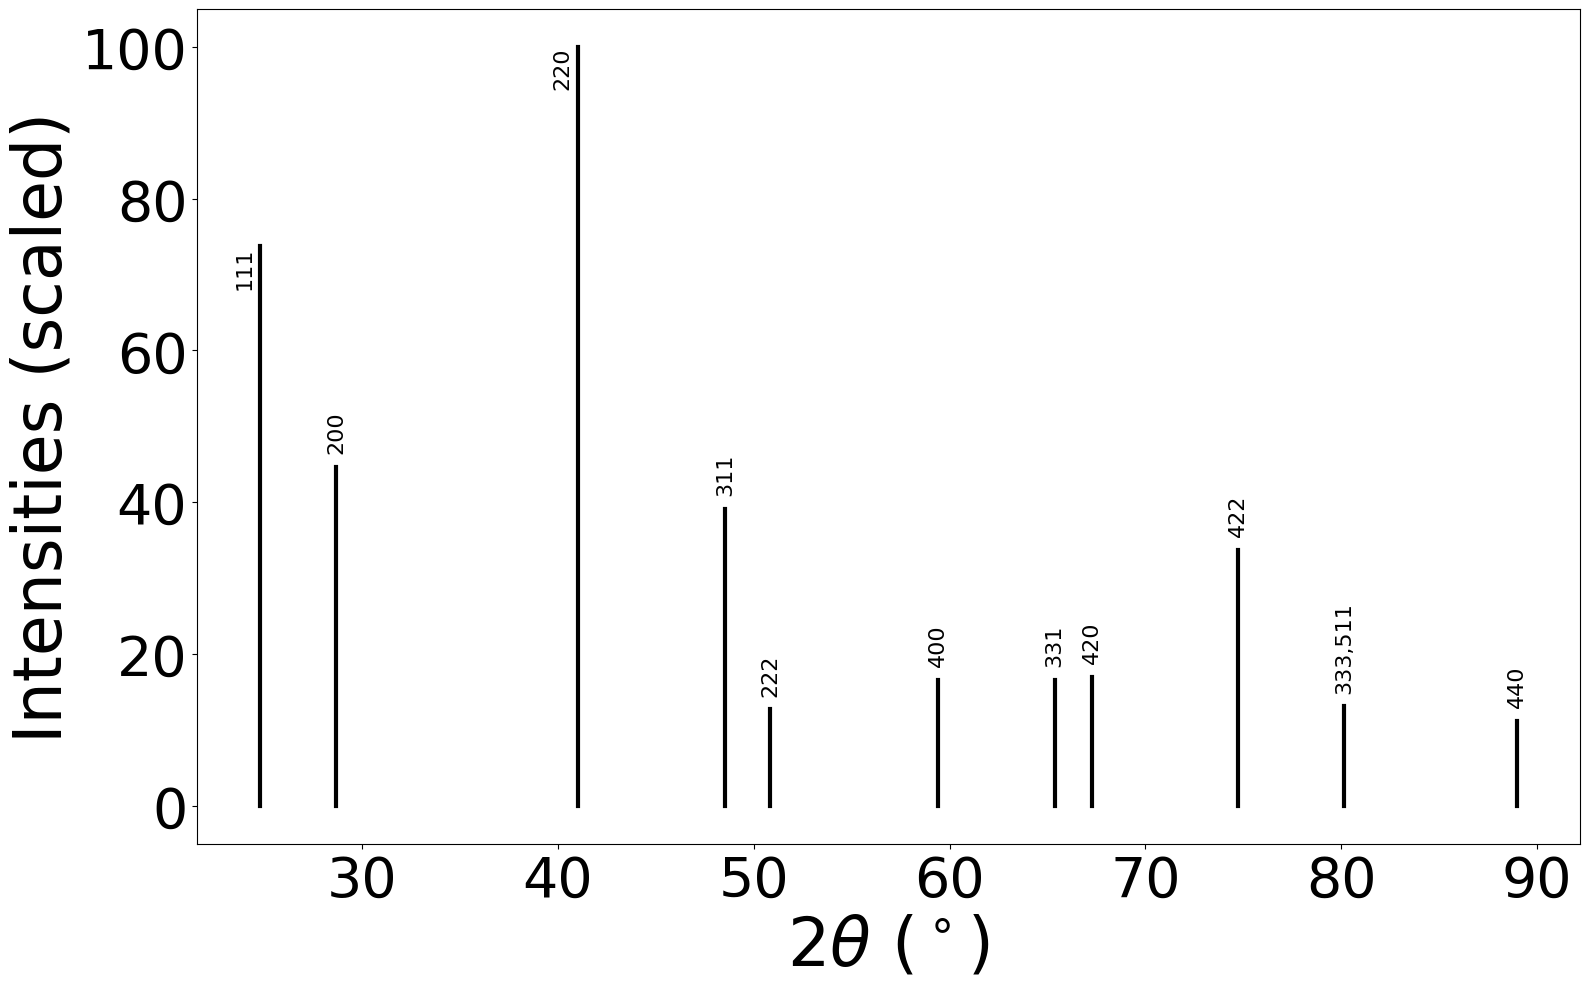

In [69]:
# Les lignes de code ont directement été reprises de l'API disponible sur Materials Project dans la section "Spectra->DiffractionPatterns->API"
# important to use the conventional structure to ensure that peaks are labelled with the conventional Miller indices
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

# this example shows how to obtain an XRD diffraction pattern these patterns are calculated on-the-fly from the structure
calculator = XRDCalculator(wavelength="CuKa")
xrdpattern = calculator.get_pattern(conventional_structure)
calculator.get_plot(conv_struc)
xrdpattern = xrd.get_pattern(conv_struc)

print("L'intensité est l'intensité relative par rapport au pic le plus haut,dans notre cas, le pic le plus haut est le troisième pic.")

### Premier pic

In [70]:
print("Informations sur le premier pic de diffraction :")
print("-----------------------------------------------")
print(f"2θ (degrés)               : {xrdpattern.x[0]}")
print(f"Intensité (%)             : {xrdpattern.y[0]}")
print(f"Indices de Miller         : {xrdpattern.hkls[0]}")
print(f"Distance interplanaire    : {xrdpattern.d_hkls[0]}")

Informations sur le premier pic de diffraction :
-----------------------------------------------
2θ (degrés)               : 24.78237010937704
Intensité (%)             : 73.74836593620049
Indices de Miller         : [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Distance interplanaire    : 3.5926079217498716


### Deuxième pic

In [71]:
print("Informations sur le deuxième pic de diffraction :")
print("-----------------------------------------------")
print(f"2θ (degrés)               : {xrdpattern.x[1]}")
print(f"Intensité (%)             : {xrdpattern.y[1]}")
print(f"Indices de Miller         : {xrdpattern.hkls[1]}")
print(f"Distance interplanaire    : {xrdpattern.d_hkls[1]}")

Informations sur le deuxième pic de diffraction :
-----------------------------------------------
2θ (degrés)               : 28.69254171513713
Intensité (%)             : 44.602064040687516
Indices de Miller         : [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Distance interplanaire    : 3.1112897260726053


### Troisième pic

In [72]:
print("Informations sur le deuxième pic de diffraction :")
print("-----------------------------------------------")
print(f"2θ (degrés)               : {xrdpattern.x[2]}")
print(f"Intensité (%)             : {xrdpattern.y[2]}")
print(f"Indices de Miller         : {xrdpattern.hkls[2]}")
print(f"Distance interplanaire    : {xrdpattern.d_hkls[2]}")


Informations sur le deuxième pic de diffraction :
-----------------------------------------------
2θ (degrés)               : 41.025516152053996
Intensité (%)             : 100.0
Indices de Miller         : [{'hkl': (2, 2, 0), 'multiplicity': 12}]
Distance interplanaire    : 2.200014063541975


## Comparaison avec les données Materials Project

Les données obtenues sont les mêmes que le site Materials Project, ce qui est totalement logique vu qu'on utilise la même API pour calculer le diagramme des pics de diffractions. Cependant, nous pouvons comparer les données obtenues avec la théorie. Nous avons un réseau cubique face centrées (F), théoriquement nous sommes censés avoir les indices de Miller suivants pour les 3 premiers pics : hlk=110, hkl=200 et hkl=220 respectivement, ce qui est le cas ici. La théorie est en accord avec les résultats donc.